In [ ]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

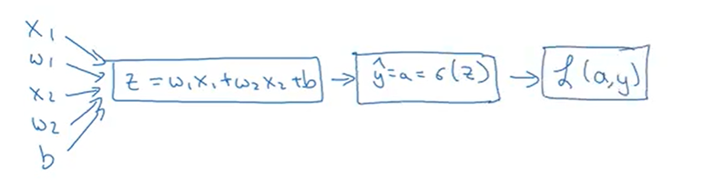

implementing sigmoid function

In [ ]:
def sigmoid(Z):
  return (1/(1 + np.exp(-Z)))

To implement WX + [b + …. + b] in python is Z = np.dot(W, X)+ b

Compute z

In [ ]:
def Compute_Z(X,W,B):
  z = np.dot(X,W) + B
  return z

defining the cost function

In [ ]:
def Logistic_Cost_f(Y,YHat,m):
  loss = np.dot(Y,np.log(YHat)) + (1-Y) * np.log(1-YHat)
  cost = (-1/m) * loss
  return cost

the cost function measures how well the parameters W and B are doing on the training set so in order to learn the set of parameters W and B it seems natural that we want to find W, B that make the cost function J (w, b) as small as possible. we will do that using gradient desent.

implementing gradient desent for logistic regression

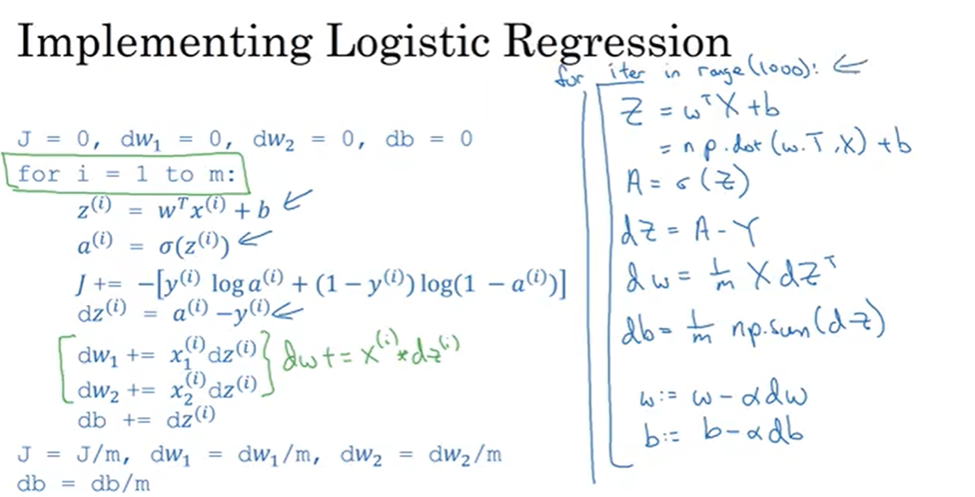

In [ ]:
def GD_Logistic_Regression(X,W,B,Y,alpha,iter_number):
  num_samples, num_features = X.shape
  for iter in range(iter_number):
    Z = Compute_Z(X,W,B)
    A = sigmoid(Z)
    dz = A - Y
    dw = (1/num_samples) *  np.dot(X.T,dz)
    db = (1/num_samples) * np.sum(dz)
    W = W - alpha * dw
    B = B - alpha * db

  return W , B

test

In [ ]:
X_train = np.array([[1, 2], [2, 3], [3, 4]])
# print(X_train.T.shape)
y_train = np.array([0, 1, 1])
X_test = np.array([[4, 5], [5, 6]])
num_samples, num_features = X_train.shape
Weights = np.zeros((num_features, 1))
bais = 0
learning_rate=0.01
num_iterations=10

#it didn't work until i made it X_train.T
# new_w , new_b = GD_Logistic_Regression(X_train,Weights,bais,y_train,learning_rate,num_iterations)

new_w , new_b = GD_Logistic_Regression(X_train,Weights,bais,y_train,learning_rate,num_iterations)

def predict(X,weights,bias):
    linear_model = np.dot(X, weights) + bias
    predictions = sigmoid(linear_model)
    return np.where(predictions > 0.5, 1, 0)

predictions = predict(X_test,new_w,new_b)
print(predictions)

[[0 1 1]
 [0 1 1]]


# Better Implementation

In [ ]:
class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, num_iterations=1000,thereshold = 0.5):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.thereshold = thereshold
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (predictions - y))
            db = (1 / num_samples) * np.sum(predictions - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return np.where(predictions > self.thereshold, 1, 0)

    def accuracy(self, x_test, y_test):
        y_pred = self.predict(x_test)
        return np.sum(y_pred==y_test)/len(y_test)


testing on iris data set

In [ ]:
# Load Iris dataset
iris = load_iris()
x = iris.data
y = iris.target
# making the first flower class 0 and the second and third flower of class 1
y[50:150] = 1
# stucking the new data together to use it to for shuffling later
data = np.column_stack((x,y))
shufled_data = shuffle(data)
# our new data after shuffling
X = shufled_data[:, 0:4]
Y = shufled_data[:, 4]
# using train_test_split function to split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# dump thereshold just to check the model on the data
model = LogisticRegressionGD(learning_rate=0.01, num_iterations=100,thereshold=.8)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Predictions:", predictions)
print("actual output:", y_test)

acc = model.accuracy( X_test, y_test )
print(acc)



Predictions: [1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 1 1 0 1 1 1]
actual output: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
0.7777777777777778


New test

In [ ]:
breast_cancer = load_breast_cancer()
# Extract the data and target from the Bunch object
X = breast_cancer.data
y = breast_cancer.target

# Stack the data and target together
data = np.column_stack((X, y))

# Shuffle the combined data
shuffled_data = shuffle(data,random_state=42)
# Separate the shuffled data and target
X_shuffled = shuffled_data[:, :-1]  # All columns except the last one (data)
y_shuffled = shuffled_data[:, -1]   # targets

normalized_Xshuffled_data = preprocessing.normalize(X_shuffled)


X_train, X_test, y_train, y_test = train_test_split(normalized_Xshuffled_data, y_shuffled, test_size=0.3, random_state=42)

model = LogisticRegressionGD(learning_rate=0.01, num_iterations=1000,thereshold=.5)
model.fit(X_train, y_train)

acc = model.accuracy( X_test, y_test )
print(acc)

# compare my model result with sklearn model
print("SKLEARN MODEL")
# Initialize the logistic regression model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


0.6198830409356725
SKLEARN MODEL
Accuracy: 0.7192982456140351


# **Logistic Regression with Regularization term**


*   Regularization is just making the weights of certain feature small.
*   Like if we have: W_1  X_1 + W_2  X_2 + W_3  X_3 + W_4  X_4 + b
  Regularization will make W_3  and W_4 small values so that the features will have a small effect to the model. For example, 10 X_1 + 5 X_2 + .0001 X_3 + .00005 X_4 + 100
*   So, the question now why we just remove these features instead of making the effect small? Because sometimes we don’t know what features we want to remove and sometimes it may influence predictions.







implementing regularization cost

In [ ]:
def Reg_Logistic_Cost_f(Y,YHat,m,lamda,weights):
  loss = np.dot(Y,np.log(YHat)) + (1-Y) * np.log(1-YHat)
  cost = (-1/m) * loss +  (lamda/(2*m)) * np.sum(weights**2)
  return cost

testing reg_logistic_cost_f

In [ ]:
np.random.seed(1)
X_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(X_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
m = X_tmp.shape[0]
#compute yhat
Z = Compute_Z(X_tmp,w_tmp,b_tmp)
yhat = sigmoid(Z)

cost_tmp = Reg_Logistic_Cost_f(y_tmp, yhat, m, lambda_tmp, w_tmp )

print("Regularized cost:", cost_tmp)

Regularized cost: [0.45661735 0.18210521 0.44340758 0.18210521 0.44751655]


In [ ]:
class LogisticRegressionGDREG:
    def __init__(self, learning_rate=0.01, num_iterations=1000, lamda=2, threshold=0.5):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.lamda = lamda
        self.threshold = threshold
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (predictions - y)) + (self.lamda / num_samples) * self.weights
            db = (1 / num_samples) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return np.where(predictions > self.threshold, 1, 0)

    def get_weights(self):
        return self.weights

    def get_bias(self):
        return self.bias

    def accuracy(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return np.sum(y_pred == y_test) / len(y_test)



In [ ]:
#first model implementation
print("first regularized model")
Regulized_model = LogisticRegressionGDREG(learning_rate=0.1, num_iterations=100,lamda=10,threshold=.7)
Regulized_model.fit(X_train, y_train)

acc1 = Regulized_model.accuracy( X_test, y_test )
print(acc1)

print("second regularized model")
Regulized_model1 = LogisticRegressionGDREG(learning_rate=0.1, num_iterations=1000,lamda=150,threshold=.6)
Regulized_model1.fit(X_train, y_train)

acc1 = Regulized_model1.accuracy( X_test, y_test )
print(acc1)

# Train the model using sklearn
regularization_strength = 100.0
reg_log_reg = LogisticRegression(C=regularization_strength, max_iter=1000)
print("SKLEARN MODEL")
reg_log_reg.fit(X_train, y_train)
print(reg_log_reg.score(X_test, y_test))

print("second SKLEARN MODEL")
regularization_strength2 = 11000.0
reg_log_reg2 = LogisticRegression(C=regularization_strength2, max_iter=1000)
reg_log_reg2.fit(X_train, y_train)
print(reg_log_reg2.score(X_test, y_test))

first regularized model
0.38011695906432746
second regularized model
0.6198830409356725
SKLEARN MODEL
0.8713450292397661
second SKLEARN MODEL
0.9122807017543859
